In [1]:
!pip install opencv-python

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline


The type of this input is <class 'numpy.ndarray'>
Shape: (1333, 1333, 3)


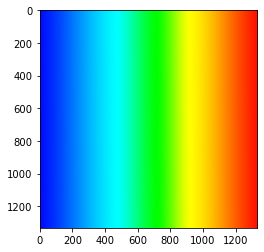

In [3]:
image = cv2.imread('rainbow-sq.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


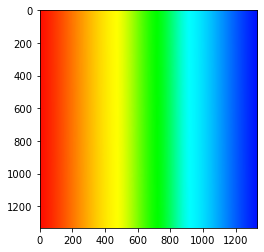

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

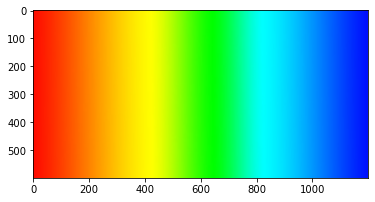

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)


In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
  

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

In [9]:
IMAGE_DIRECTORY = 'sowmya'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[255,0,0],
    'SKY BLUE':[135,206,235],
    'MAROON':[128,0,0],
    'OLIVE':[128,128,0],
    'PINK':[255,192,203],
    'ORANGE':[255,165,0],
    'MAGNETA':[255,0,255],
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

[array([2.54105802e-01, 1.47439135e+02, 2.54728976e+02]),
 array([242.79371031, 243.9140006 ,   0.33655881]),
 array([254.72933134,  40.24238411,   0.3030549 ]),
 array([ 18.03580948, 254.93707266,  13.9600958 ]),
 array([2.16868362e-01, 5.46120795e+01, 2.54639540e+02]),
 array([254.8459434 , 179.92745283,   0.33183962]),
 array([130.68001476, 254.95644953,   0.26019561]),
 array([2.05168814e-01, 2.54901015e+02, 1.31583255e+02]),
 array([  0.2519266 , 235.98830954, 246.29293047]),
 array([254.82216195, 109.45074583,   0.29939946])]

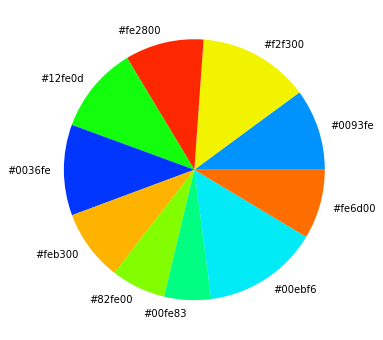

In [10]:
get_colors(get_image('rainbow-sq.jpg'), 10, True)

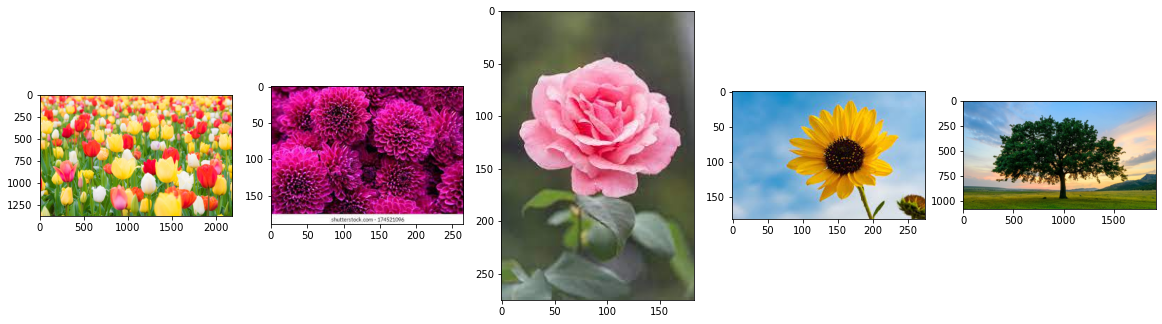

In [11]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [12]:
    
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [13]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

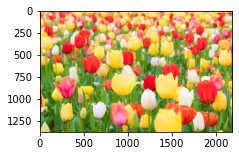

In [14]:
# Search for RED
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)


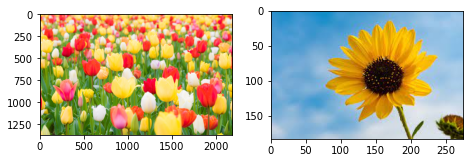

In [15]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)


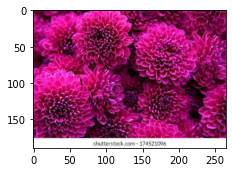

In [16]:
#Search for MAGNETA
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['MAGNETA'], 60,5)